<a href="https://colab.research.google.com/github/lorenzotomada/Applied_Mathematics/blob/main/Code/AM_lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Polynomial interpolation using Lagrange basis**

**Definition of the basis:**

In [197]:
%pylab inline
x = linspace(0,1,100) # Evaluation points
n = 7 # The degree
X = linspace(0, 1, n+1) # Points on which we interpolate

# We define a function returning the i-th element of the Lagrange basis relevant to the points of X:
def lagrange(x,i,X):
    l=x*0+1 # We initialize to 1
    for j in range(len(X)):
        if i !=j:
        l=l*(x-X[j])/([X[i]-X[j]]) # Definition of Lagrange basis: see the slides for more info.
    return l

# Another way:
def lagrange_slow(x,i,X):
  # Called this way because it performs the same operation, but is slower.
  return prod([(x-X[j])/([X[i]-X[j]]) for j in range(len(X)) if i !=j], axis=0)

Populating the interactive namespace from numpy and matplotlib


Now, we measure the efficiency of the two previous functions:

In [198]:
import time # To measure how long it takes to execute the previous functions.
start = time.time() # starter time
l0=lagrange(x,0,X)
stop=time.time() # final time
print('Time lagrange: ', stop-start)

start1=time.time()
l0=lagrange_slow(x,0,X)
stop1=time.time()
print('Time lagrange_slow: ', stop1-start1)

Time lagrange:  0.00029587745666503906
Time lagrange_slow:  0.0003428459167480469


Example: plot of the 3rd element of the basis.

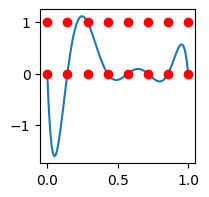

In [199]:
l2=lagrange(x,2,X)
figsize(2,2)
plot(x,l2)
plot(X,X*0, 'ro')
plot(X,X*0+1, 'ro')

**Now we create the matrix V:**

In [200]:
V=zeros((len(x), len(X)))
for i in range(len(X)):
    V[:,i]=lagrange(x,i,X)

# In a more efficient way:
V = array([lagrange(x,i,X) for i in range(len(X))]).T # .T to transpose the result

We plot the elements of the basis:

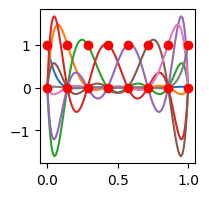

In [201]:
plot(x,V) # Interesting, we are plotting a matrix. It looks like it is plotting each column.
plot(X,X*0, 'ro') # Plotting the red dots at height 1
plot(X,X*0+1, 'ro') # Same, with y-coordinate = 0

**We now define the Runge function and we plot it:**

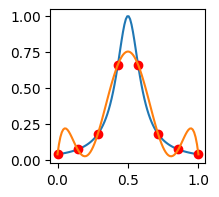

In [202]:
def runge(x):
    return 1/(1+100*(x-0.5)**2) # in (0,1)
  #return 1/(1+x**2) # The original function (not in [0,1]).
  # If we are far from the singularity, still a good result with equispaced nodes!
  # You can check it uncommenting the second definition and commenting the first one.

# Here there is no legend because it would make the figure less readable.
plot(x, runge(x), label='Runge') # The blue one
plot(X,runge(X), 'ro') # The dots
plot(x, V.dot(runge(X)), label='Interp. polyn.') # The orange one
# legend()
# Recall that Vp=u

**Now we define and plot the Lebesgue function relevant to the nodes of X:**

Text(0.5, 1.0, 'Lebesgue function with equispaced nodes')

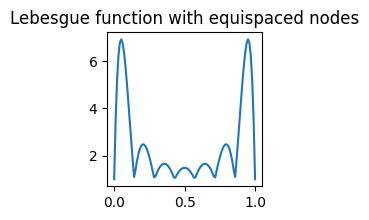

In [203]:
lebesgue = sum(abs(V), axis=1) # Summing over the colums
plot(x,lebesgue)
title('Lebesgue function with equispaced nodes')

# The runge function is not analytically ext => oscillations!
# If we move away from the "bad points", fine, as seen in the previous cell.

**Now we define a function to get Čebyšëv nodes:**

Here n is the number of points. We set a=0 and b=1 as default values since we will be working in the interval [0,1].

In [204]:
def chebyshev_nodes(n, a=0, b=1):
    i= array(range(n))
    x=cos((2*i+1)*pi/(2*n)) # nodes on the interval [-1,1]
    return 0.5*(b-a)*x+0.5*(b+a) # to have them in [0,1]

We plot them, as well as the corresponding Lagrange basis:

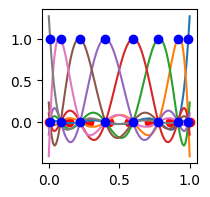

In [205]:
plot(X, X*0, 'ro')
X=chebyshev_nodes(n+1)
V = array([lagrange(x,i,X) for i in range(len(X))]).T
plot(x,V)
plot(X,X*0, 'bo')
plot(X,X*0+1, 'bo')

**Lebesgue function with Čebyšëv nodes:**

Text(0.5, 1.0, 'Lebesgue function with Čebyšëv nodes')

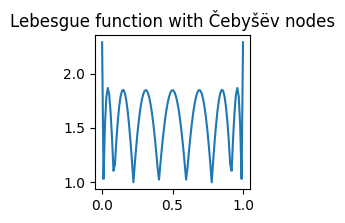

In [206]:
lebesgue=sum(abs(V), axis=1)
plot(x,lebesgue)
title('Lebesgue function with Čebyšëv nodes')

When looking at the values attained by the Lebesgue function near 0 and 1, we can see that it is flatter than in the case of equispaced nodes.

**Interpolating polynomial and error:**

Now we plot the interpolating polynomial. Also here, there will be no legend for readability reasons (the orange line represent the interpolating polynomial, whereas the blue line is Runge's function).

We also plot the error as a function of the degree of the interpolating polynomial.

Note that the y-axis is in logarithmic scale.

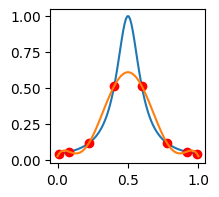

In [207]:
plot(x, runge(x))
plot(X, runge(X), 'ro')
plot(x, V.dot(runge(X)))

While the approximation is not perfect using a polynomial of degree 7, at least we do not have as many oscillations near the boundary as before.

Now we define a function to compute the error for a given range value, taking as input the set of interpolation points, the function u and range_of_n.

In [208]:
def compute_error1(x, u, range_of_n):
    error=[] # initialize as an empty list
    lebesgue=[]
    for n in range_of_n:
        X = chebyshev_nodes(n+1) # To use Čebyšëv nodes.
        #X=linspace(0,1,n+1) #To use equispaced nodes.
        V = array([lagrange(x,i,X) for i in range(len(X))]).T
        lebesgue_norm=max(sum(abs(V), axis=1))
        error_u = u(x)-V.dot(u(X))
        error_norm = max(abs(error_u))
        error.append(error_norm) # add to the list
        lebesgue.append(lebesgue_norm)
    return error, lebesgue # we return both as output

Now we plot it:

Text(0, 0.5, 'Error')

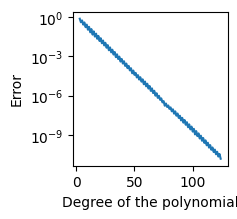

In [209]:
N = range(3,125)
e, l = compute_error1(x, runge, N)
plot(N,e)
yscale('log') #it decreases
xlabel('Degree of the polynomial')
ylabel('Error')

More or less, we have linear convergence.

Try to see what happens using equispaced nodes!

Now we shall do some more tests, using the sine function and the translated absolute value function.

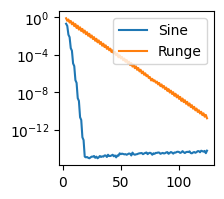

In [210]:
# Sine
def sen(x):
    return sin(2*pi*x)

esin, lsin = compute_error1(x,sen,N) # error for the sine function
plot(N, esin, label = 'Sine')
plot(N, e, label = 'Runge')
legend()
yscale('log') # For the sine function, the error reaches the machine epsilon with using fewer interpolation points.

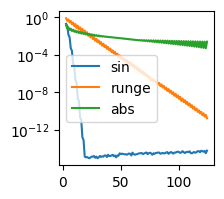

In [211]:
# Absolute value
def abs_value(x):
    return(abs(x-0.5))

eabs, labs=compute_error1(x, abs_value, N)
plot(N, esin, label = 'sin')
plot(N,e, label = 'runge')
plot(N, eabs, label = 'abs')
legend()
yscale('log')
# Here the error reaches a plateau, we cannot do better even with Čebyšëv points.

Now we plot the Lebesgue function (which is the same for all these three functions, depending only on the points).

As we can see (most importantly, as can be proved), in the case of Čebyšëv nodes, Lebesgue's functions grows logarithmically, whereas in the case of equispaced nodes, it grows exponentially.

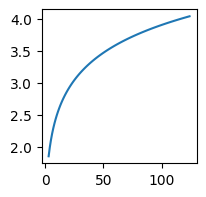

In [212]:
plot(N, labs)

Now we plot the interpolating polynomial of the absolute value function:

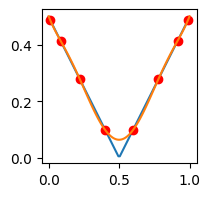

In [213]:
plot(x, abs_value(x))
plot(X, abs_value(X), 'ro')
plot(x, V.dot(abs_value(X)))

# **Bernestein polynomials**
They are not interpolating polynomials; used in the proof of density of the space of polynomials in C^0([a,b]).

In [214]:
import scipy #  Here you also have other algorithms e.g. for interpolation; you can check if what you are doing actually works.
from scipy.special import binom # binomial coefficient

Now we define a function returning the i-th Bernstein polynomial of degree n as output:

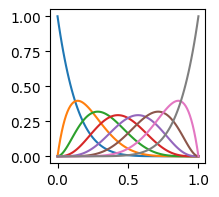

In [215]:
def bernstein(x,i,n):
    return binom(n,i)*x**i*(1-x)**(n-i)

for i in range(n+1): # We also plot them
    plot(x, bernstein(x,i,n))

Now to see how e.g. the sine function is approximated:

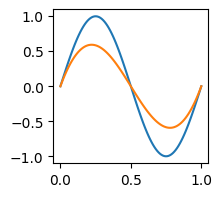

In [216]:
V = array([bernstein(x,i,n) for i in range(n+1)]).T
X = linspace(0,1,n+1) # It works even with equispaced nodes
plot(x, sen(x))
plot(x, V.dot(sen(X)))

We define a function returning the Bernstein approximation of a given function u, taking as parameters also the interval x and the degree n (we also plot them for some values of n):

In [217]:
def bernstein_approx(x, u, n):
    V = array([bernstein(x,i,n) for i in range(n+1)]).T
    X = linspace(0,1,n+1)
    return V.dot(u(X))

[[<matplotlib.lines.Line2D at 0x7b3f8a91fd00>],

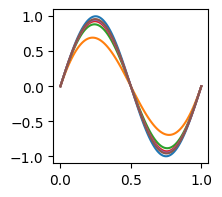

In [218]:
# With the sine function
plot(x, sen(x))
#legend()
[plot(x, bernstein_approx(x,sen,i)) for i in range(10,100,20)]

[[<matplotlib.lines.Line2D at 0x7b3f8a8adc00>],

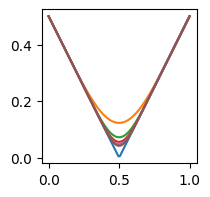

In [219]:
# Same with the absolute value
plot(x,abs_value(x))
#legend()
[plot(x, bernstein_approx(x,abs_value,i)) for i in range(10,100,20)] #problems reaching the blue lines, but no oscillations. Slow convergence

[[<matplotlib.lines.Line2D at 0x7b3f891ac6d0>],

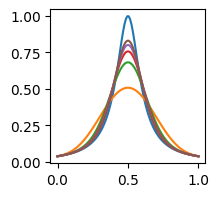

In [220]:
# Same with Runge
plot(x, runge(x))
#legend()
[plot(x, bernstein_approx(x,runge,i)) for i in range(10,100,20)]

Now we define a function to compute the error for a given range value, taking as input the interval, the function u and range_of_n.

In [221]:
def compute_error2(x, u, range_of_n):
    error=[]
    for n in range_of_n:
        X = linspace(0, 1, n+1)
        V = array([bernstein(x,i,n) for i in range(n+1)]).T
        error_u = u(x) - V.dot(u(X))
        error_norm = max(abs(error_u))
        error.append(error_norm)
    return error

**Comparison with the error of Lagrangian interpolation:**

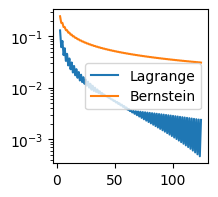

In [222]:
N=range(3,125)
e_ = compute_error2(x,runge,N)
esin_ = compute_error2(x, sen, N)
eabs_ = compute_error2(x, abs_value, N)
plot(N, eabs, label = 'Lagrange')
plot(N, eabs_, label = 'Bernstein')
legend()
yscale('log')

For Bernstein polynomials, if the function is continuous, we always have convergence. We can see that the line is very smooth, yet, it goes down very slowly. Hence these polynomials are used mostly when trying to obtain theoretical results.